In [218]:
import pygeostat as gs
import numpy as np
import os
from matplotlib import pyplot as plt
print(gs.__version__)

1.0.0


# Settings

In [219]:
outdir = 'Output'
gs.mkdir(outdir)

gs.PlotStyle['font.size'] = 12
gs.Parameters['data.tmin'] = -998

# Loading data

In [220]:
#dfl = gs.ExampleData('point2d_surf')
# the version of nscore I have is truncating the file path of the example folder
dfl = gs.DataFile('point2d_surf.dat')
dfl.head()

,HoleID,X,Y,Top Elevation,Thickness,Base Elevation
0,3.0,405.63,2135.75,376.69,47.98,328.71
1,5.0,235.89,1865.70,379.69,51.00,328.69
2,6.0,325.03,2055.81,376.86,49.34,327.52
3,7.0,675.54,2195.25,381.49,48.75,332.74
4,8.0,355.73,1995.74,376.97,48.94,328.03


In [221]:
dfl.info

DataFile: point2d_surf.dat
Attributes:
dh: 'HoleID',  x: 'X',  y: 'Y',  
Variables:
'Top Elevation', 'Thickness', 'Base Elevation'


In [222]:
dfl.describe()

,Top Elevation,Thickness,Base Elevation
count,230.000000,230.000000,230.000000
mean,379.173739,50.096391,329.077348
std,2.607090,4.376842,4.571519
min,372.070000,37.730000,315.850000
25%,377.222500,47.502500,327.137500
50%,378.950000,49.390000,329.140000
75%,380.782500,51.900000,332.225000
max,386.330000,62.870000,340.870000


In [223]:
top_mean = dfl['Top Elevation'].mean()
top_mean

379.17373913043474

# Data Visualizations

## Distibution

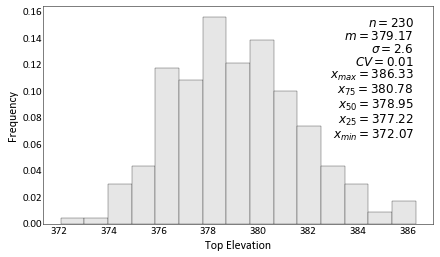

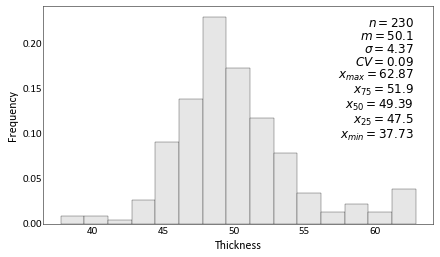

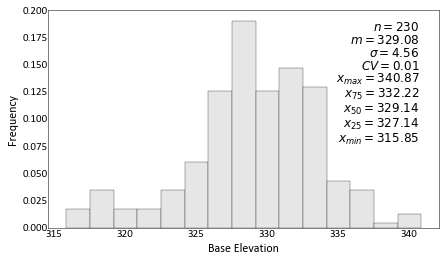

In [224]:
for var in dfl.variables:
    gs.histogram_plot(dfl, var=var, figsize = (7,4))

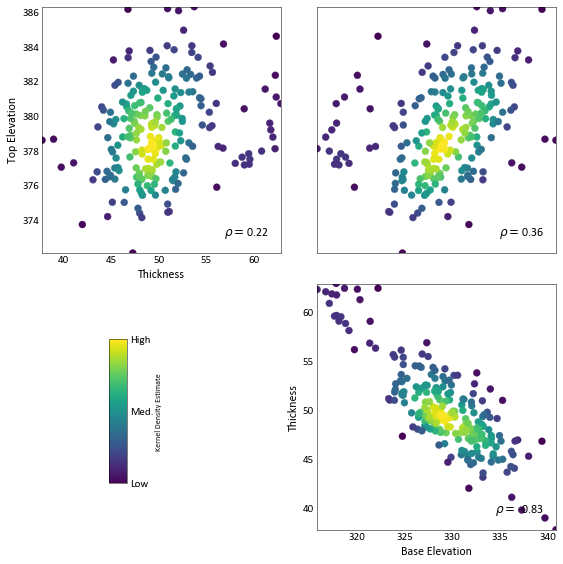

In [225]:
_ = gs.scatter_plots(dfl)

## Location map

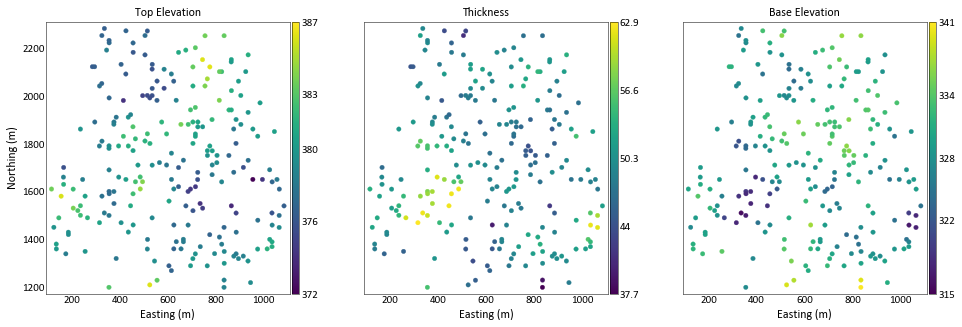

In [226]:
fig, axes = gs.subplots(1, len(dfl.variables), axes_pad=(0.9, 0.4), figsize= (25,5), cbar_mode='each', label_mode='L')
for i, var in enumerate(dfl.variables):
    gs.location_plot(dfl, var = var, ax = axes[i])

# Normal Score Transformation

In [227]:
nscore_p = gs.Program(program = 'nscoremv', getpar=True)

D:\01 Assignments\CourseMaterial\615March2020\notebooks\tmpcm1sxah2/nscoremv.par has been copied to the clipboard


In [228]:
# parstr = """      Parameters for NSCORE
#                   *********************

# START OF PARAMETERS:
# {datafile}                -file with data
# {n_var}  4 5 6           -  number of variables and columns
# 0                         -  column for weight, 0 if none
# 0                         -  column for category, 0 if none
# 0                         -  number of records if known, 0 if unknown
# {tmin}   1.0e21          -  trimming limits
# 0                         -transform using a reference distribution, 1=yes
# nofile.out                -file with reference distribution.
# 1   2   0                 -  columns for variable, weight, and category
# 201                       -maximum number of quantiles, 0 for all
# {outfl}                -file for output
# {trnfl}                -file for output transformation table
# """

# nscore_outfl = os.path.join(outdir, 'nscore.out')

# pars = dict(datafile=dfl.flname,
#             tmin=gs.Parameters['data.tmin'],
#             n_var = len(dfl.variables),
#             outfl = nscore_outfl,
#             trnfl = os.path.join(outdir, 'nscore.trn'))
# nscore_p.run(parstr=parstr.format(**pars),quiet=True, liveoutput=True)

In [229]:
parstr = """                Parameters for NSCOREMV
                ************************

START OF PARAMETERS:
{datafile}                   -  file with data               
{n_var}                           -  number of variables to transform
4 5 6                       -  columns for variables      
0 0 0                       -  columns for weights        
{tmin} 1.0e21                 -  trimming limits
{outfl}                      -  file for output              
nscore_top.trn                -  file for first transformation table
nscore_elev.trn                -  file for second transformation table
nscore_bot.trn              -  file for third transformation table
0  0  0                     -  transform according to ref. dist., column numbers
histsmth.out                -  file with reference dist.  
0  0  0                     -  transform according to ref. dist., column numbers
histsmth.out                -  file with reference dist.  
"""

nscore_outfl = os.path.join(outdir, 'nscore.out')

pars = dict(datafile=dfl.flname,
            tmin=gs.Parameters['data.tmin'],
            n_var = len(dfl.variables),
            outfl = nscore_outfl,)
nscore_p.run(parstr=parstr.format(**pars),quiet=True, liveoutput=True)


 NSCOREMV Version: 4.000

  data file = point2d_surf.dat                        
  Number of variables to transform =            3
  columns for variables:  4  5  6 
  columns for weights:    0  0  0 
  file for output = Output\nscore.out                       
  file for transformation table            1  = 
 nscore_top.trn                          
  file for transformation table            2  = 
 nscore_elev.trn                         
  file for transformation table            3  = 
 nscore_bot.trn                          
  Checking for reference distributions:
    not considering ref distributions

 NSCOREMV Version: 4.000 Finished



In [230]:
dfl_ns = gs.DataFile(nscore_outfl)
dfl_ns.head()

,HoleID,X,Y,Top Elevation,Thickness,Base Elevation,NScore: Top Elevation,NScore: Thickness,NScore: Base Elevation
0,3.0,405.63,2135.75,376.69,47.98,328.71,-0.930381,-0.518158,-0.136654
1,5.0,235.89,1865.70,379.69,51.00,328.69,0.236502,0.432721,-0.147663
2,6.0,325.03,2055.81,376.86,49.34,327.52,-0.818550,-0.016348,-0.505734
3,7.0,675.54,2195.25,381.49,48.75,332.74,0.865150,-0.281586,0.818550
4,8.0,355.73,1995.74,376.97,48.94,328.03,-0.773662,-0.214144,-0.397086


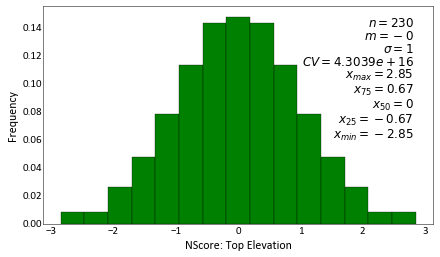

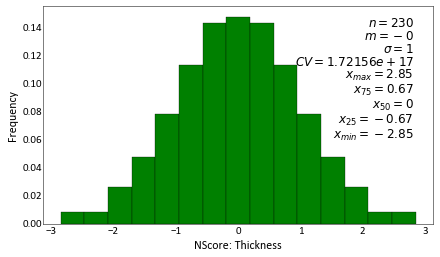

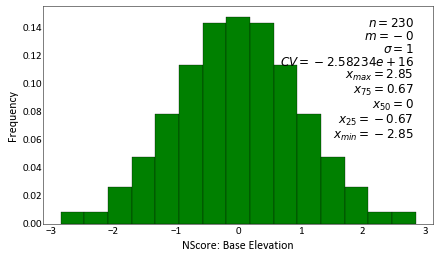

In [231]:
for var in dfl_ns.variables:
    if 'ns' in var.lower():
        gs.histogram_plot(dfl_ns, var=var, color='g', figsize = (7,4))

# Variogram Calculation and Modeling

In [232]:
dfl_ns.spacing(n_nearest=2)
dfl_ns.head()

,HoleID,X,Y,Top Elevation,Thickness,Base Elevation,NScore: Top Elevation,NScore: Thickness,NScore: Base Elevation,Data Spacing (m)
0,3.0,405.63,2135.75,376.69,47.98,328.71,-0.930381,-0.518158,-0.136654,57.952680
1,5.0,235.89,1865.70,379.69,51.00,328.69,0.236502,0.432721,-0.147663,84.885990
2,6.0,325.03,2055.81,376.86,49.34,327.52,-0.818550,-0.016348,-0.505734,40.660709
3,7.0,675.54,2195.25,381.49,48.75,332.74,0.865150,-0.281586,0.818550,36.354945
4,8.0,355.73,1995.74,376.97,48.94,328.03,-0.773662,-0.214144,-0.397086,62.080596


## Horizonal variogram parameters

In [233]:
lag_length_h = dfl_ns['Data Spacing (m)'].values.mean()
print('average data spacing in XY plane: {:.3f} {}'.format(lag_length_h,
                                                           gs.Parameters['plotting.unit']))

average data spacing in XY plane: 42.812 m


In [234]:
x_range = np.ptp(dfl[dfl.x].values)
y_range = np.ptp(dfl[dfl.y].values)
n_lag_x =  np.ceil((x_range * 0.5) /  lag_length_h)
n_lag_y =  np.ceil((y_range * 0.5) /  lag_length_h)
lag_tol_h = lag_length_h * 0.6

In [235]:
var_calc = gs.Program(program='varcalc')

In [236]:
parstr = """      Parameters for VARCALC
                  **********************
 
START OF PARAMETERS:
{file}                             -file with data
2 3 0                              -   columns for X, Y, Z coordinates
1 7                                -   number of variables,column numbers (position used for tail,head variables below)
{t_min}    1.0e21                   -   trimming limits
{n_directions}                                  -number of directions
0.0 15 1000 0.0 22.5 1000 0.0   -Dir 01: azm,azmtol,bandhorz,dip,diptol,bandvert,tilt
 {n_lag_y}  {lag_length_h}  {lag_tol_h}            -        number of lags,lag distance,lag tolerance
90.0 15 1000 0.0 22.5 1000 0.0   -Dir 02: azm,azmtol,bandhorz,dip,diptol,bandvert,tilt
 {n_lag_x}  {lag_length_h}  {lag_tol_h}                 -        number of lags,lag distance,lag tolerance
{output}                          -file for experimental variogram points output.
0                                 -legacy output (0=no, 1=write out gamv2004 format)
1                                 -run checks for common errors
1                                 -standardize sills? (0=no, 1=yes)
1                                 -number of variogram types
1   1   1   1                     -tail variable, head variable, variogram type (and cutoff/category), sill
"""

n_directions = 2
varcalc_outfl = os.path.join(outdir, 'varcalc.out')

var_calc.run(parstr=parstr.format(file=dfl_ns.flname,
                                  n_directions = n_directions,
                                  t_min = gs.Parameters['data.tmin'],
                                  n_lag_x=n_lag_x,
                                  n_lag_y=n_lag_y,
                                  lag_length_h = lag_length_h,
                                  lag_tol_h = lag_tol_h,
                                  output=varcalc_outfl),
             liveoutput=True)

Calling:  ['varcalc', 'temp']

varcalc version: 1.5.0

  data file: Output\nscore.out
  x,y,z columns:            2           3           0
  number of variables:            1
  Variable columns:            7
  tmin,tmax:   -998.000000000000       1.000000000000000E+021
  number of directions:            2
  direction parameters:
 azm,azmtol,bandhorz  0.000000000000000E+000   15.0000000000000     
   1000.00000000000     
 dip,diptol,bandvert  0.000000000000000E+000   22.5000000000000     
   1000.00000000000     
 tilt  0.000000000000000E+000
 nlags,lagdist,lagtol          13   42.8115108947752     
   25.6869065368651     
 azm,azmtol,bandhorz   90.0000000000000        15.0000000000000     
   1000.00000000000     
 dip,diptol,bandvert  0.000000000000000E+000   22.5000000000000     
   1000.00000000000     
 tilt  0.000000000000000E+000
 nlags,lagdist,lagtol          12   42.8115108947752     
   25.6869065368651     
  output file: Output\varcalc.out
  legacy output?            0
  

In [237]:
varfl = gs.DataFile(varcalc_outfl)
varfl.head()

,Variogram Index,Lag Distance,Number of Pairs,Variogram Value,Variogram Number,Calculation Azimuth,Calculation Dip,Variogram Type,Variogram Tail Index,Variogram Head Index
0,1.0,13.876815,13.0,0.012423,1.0,0.0,0.0,1.0,1.0,1.0
1,1.0,45.068702,54.0,0.159912,1.0,0.0,0.0,1.0,1.0,1.0
2,1.0,89.293385,135.0,0.349341,1.0,0.0,0.0,1.0,1.0,1.0
3,1.0,133.200325,160.0,0.581588,1.0,0.0,0.0,1.0,1.0,1.0
4,1.0,172.965087,220.0,0.931539,1.0,0.0,0.0,1.0,1.0,1.0


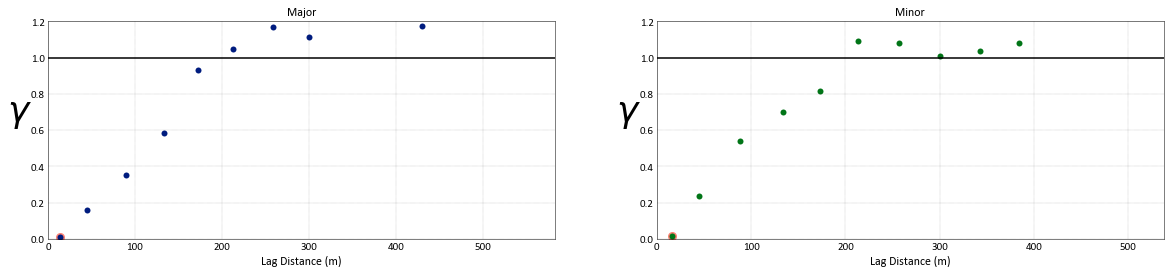

In [238]:
colors = gs.get_palette('cat_dark', n_directions, cmap=False)
titles = ['Major', 'Minor', 'Vertical']
fig, axes = plt.subplots(1, n_directions, figsize= (20,4))
for i in range(n_directions):
    gs.variogram_plot(varfl, index=i+1, ax = axes[i], color=colors[i], title = titles[i], grid=True)

In [239]:
var_model = gs.Program(program='varmodel')

In [240]:
parstr = """      Parameters for VARMODEL
                  ***********************
 
START OF PARAMETERS:
{varmodel_outfl}             -file for modeled variogram points output
3                            -number of directions to model points along
0.0   0.0  100   25          -  azm, dip, npoints, point separation
90.0   0.0  100   15       -  azm, dip, npoints, point separation
0.0   90.0  100   0.2       -  azm, dip, npoints, point separation
2    0.05                   -nst, nugget effect
3    ?    0.0   0.0   0.0    -it,cc,azm,dip,tilt (ang1,ang2,ang3)
        ?     ?     ?    -a_hmax, a_hmin, a_vert (ranges)
3    ?    0.0   0.0   0.0    -it,cc,azm,dip,tilt (ang1,ang2,ang3)
        ?     ?     ?    -a_hmax, a_hmin, a_vert (ranges)
1   100000                   -fit model (0=no, 1=yes), maximum iterations
1.0                          -  variogram sill (can be fit, but not recommended in most cases)
1                            -  number of experimental files to use
{varcalc_outfl}              -    experimental output file 1
3 1 2 3                    -      # of variograms (<=0 for all), variogram #s
1   0   10                   -  # pairs weighting, inverse distance weighting, min pairs
0     10.0                   -  fix Hmax/Vert anis. (0=no, 1=yes)
0      1.0                   -  fix Hmin/Hmax anis. (0=no, 1=yes)
{varmodelfit_outfl}          -  file to save fit variogram model
"""

varmodel_outfl = os.path.join(outdir, 'varmodel.out')
varmodelfit_outfl = os.path.join(outdir, 'varmodelfit.out')

var_model.run(parstr=parstr.format(varmodel_outfl= varmodel_outfl,
                                   varmodelfit_outfl = varmodelfit_outfl,
                                   varcalc_outfl = varcalc_outfl), liveoutput=False, quiet=True)


In [241]:
varmdl = gs.DataFile(varmodel_outfl)
varmdl.head()

,Variogram Index,Lag Distance,Number of Pairs,Variogram Value,Variogram Number,Calculation Azimuth,Calculation Dip
0,1.0,25.0,1.0,0.088696,1.0,0.0,0.0
1,1.0,50.0,1.0,0.195581,1.0,0.0,0.0
2,1.0,75.0,1.0,0.346597,1.0,0.0,0.0
3,1.0,100.0,1.0,0.511618,1.0,0.0,0.0
4,1.0,125.0,1.0,0.664095,1.0,0.0,0.0


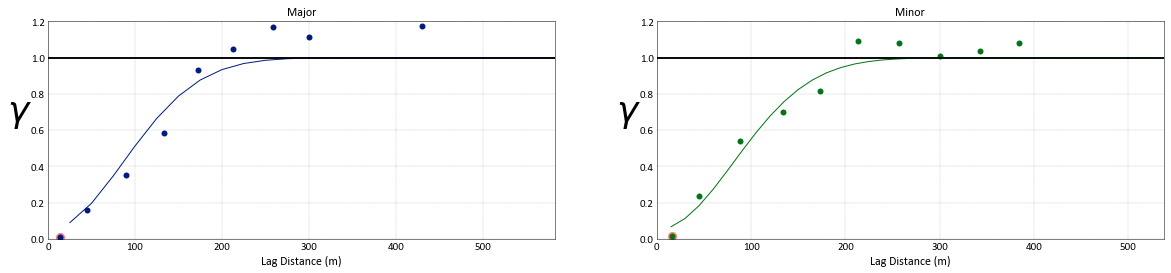

In [242]:
fig, axes = plt.subplots(1, n_directions, figsize= (20,4))
for i in range(n_directions):
    gs.variogram_plot(varfl, index=i+1, ax = axes[i], color=colors[i], title = titles[i], grid=True)
    gs.variogram_plot(varmdl, index=i+1, ax = axes[i], color=colors[i], experimental=False)

# Kriging

In [243]:
print(dfl_ns.infergriddef(nblk=[200,200,1]))

200 112.45 4.9 
200 1202.725 5.45 
1 0.5 1.0


In [244]:
kt3dn = gs.Program('kt3dn', getpar=True)

D:\01 Assignments\CourseMaterial\615March2020\notebooks\tmpxek6mhn_/kt3dn.par has been copied to the clipboard


In [245]:
parstr_ = """     Parameters for KT3DN
                 ********************
START OF PARAMETERS:
{file}                                -file with data
1  2 3 0 4 0                          -  columns for DH,X,Y,Z,var,sec var
{t_min}    1.0e21                     -  trimming limits
0                                     -option: 0=grid, 1=cross, 2=jackknife
nojack.out                           -file with jackknife data
0 0 0 0   0                          -   columns for X,Y,Z,vr and sec var
kt3dn_dataspacing.out                 -data spacing analysis output file (see note)
1    20.0                             -  number to search (0 for no dataspacing analysis, rec. 10 or 20) and composite length
0    100   0                          -debugging level: 0,3,5,10; max data for GSKV;output total weight of each data?(0=no,1=yes)
kt3dn.dbg-nkt3dn.sum                  -file for debugging output (see note)
{output}                              -file for kriged output (see GSB note)
{griddef}
1    1      1                         -x,y and z block discretization
20    80    12    1                    -min, max data for kriging,upper max for ASO,ASO incr
0      0                              -max per octant, max per drillhole (0-> not used)
500.0  500.0  150.0                   -maximum search radii
 0.0   0.0   0.0                      -angles for search ellipsoid
0                                     -0=SK,1=OK,2=LVM(resid),3=LVM((1-w)*m(u))),4=colo,5=exdrift,6=ICCK
{mean} 0.6  0.8                       -  mean (if 0,4,5,6), corr. (if 4 or 6), var. reduction factor (if 4)
0 0 0 0 0 0 0 0 0                     -drift: x,y,z,xx,yy,zz,xy,xz,zy
0                                     -0, variable; 1, estimate trend
extdrift.out                          -gridded file with drift/mean
4                                     -  column number in gridded file
keyout.out                            -gridded file with keyout (see note)
0    1                                -  column (0 if no keyout) and value to keep
{varmodel}
"""



krig_output = os.path.join(outdir, 'KrigGrid.out')
                      
with open(varmodelfit_outfl, 'r') as f:
    varmodel_ = f.readlines()
varmodel = ''''''
for line in varmodel_:
    varmodel += line


parstr=parstr_.format(file=dfl_ns.flname,
                     t_min = gs.Parameters['data.tmin'],
                     griddef = str(dfl_ns.griddef),
                     varmodel=varmodel,
                     mean=top_mean,
                     output=krig_output)
kt3dn.run(parstr=parstr, liveoutput=True)

Calling:  ['kt3dn', 'temp']

 KT3DN Version: 7.4.1

  data file = Output\nscore.out                       
  columns =            1           2           3           0           4
           0
  trimming limits =   -998.000000000000       1.000000000000000E+021
  kriging option =            0
  jackknife data file = nojack.out                              
  columns =            0           0           0           0           0
  data spacing analysis output file = kt3dn_dataspacing.out                   
  debugging level =            0
  summary only file = kt3dn.sum                               
  debugging file = kt3dn.dbg                               
  GSLIB-style output file = Output\KrigGrid.out                     
  nx, xmn, xsiz =          200   112.450000000000        4.90000000000000     
  ny, ymn, ysiz =          200   1202.72500000000        5.45000000000000     
  nz, zmn, zsiz =            1  0.500000000000000        1.00000000000000     
  block discretization:    

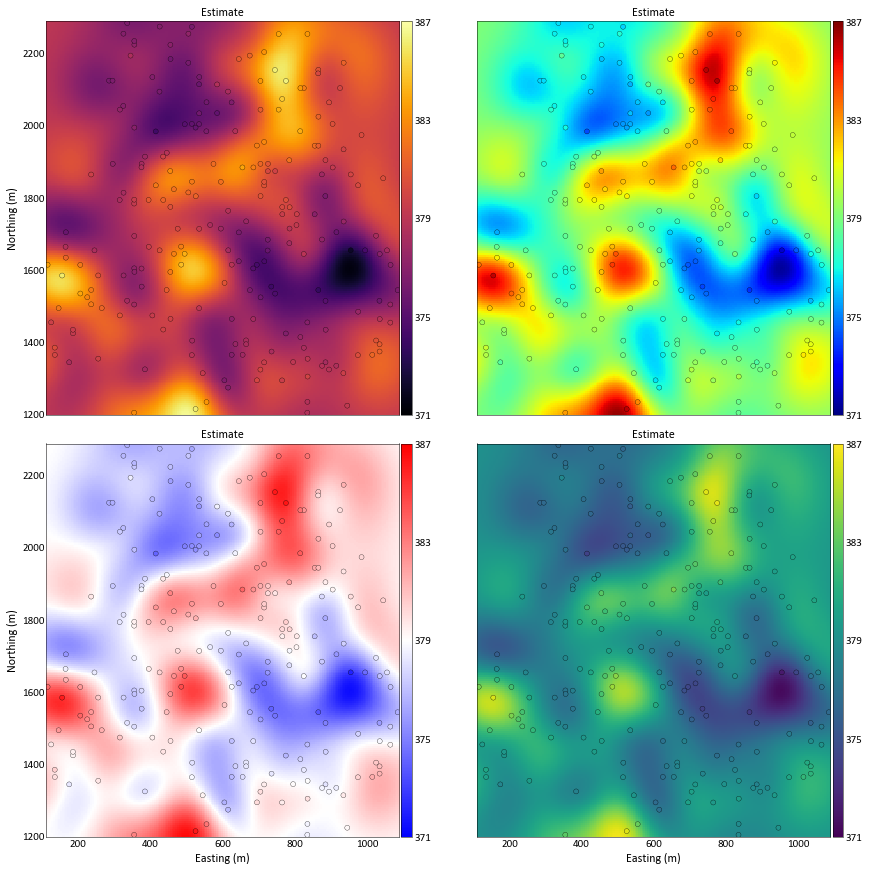

In [246]:
cmaps = ['inferno', 'jet', 'bwr', 'viridis']
fig, axes = gs.subplots(2, 2, axes_pad=(0.9, 0.4), figsize= (20,15), cbar_mode='each', label_mode='L')
for i, ax in enumerate(axes):
    gs.slice_plot(krigfl, var='Estimate', orient='xy', cmap=cmaps[i], ax=ax, pointdata=dfl_ns, 
                  pointvar='Top Elevation', pointkws={'edgecolors':'k', 's':25})

In [247]:
# Clean up
try:
    gs.rmfile('kt3dn.sum')
    gs.rmfile('kt3dn.dbg')
    gs.rmfile('kt3dn_dataspacing.out')
    gs.rmfile('temp')
    gs.rmdir(outdir)
except:
    pass